+ Residential & Commercial
+ Year built vs Sale Price
+ Total Units vs Residential/Commercial
+ Borough

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['Borough', 'Neighborhood', 'Building_Class_Category', 'Tax_Class_Current', 'Block', 'Lot', 'EaseMent', 'Building_Class_Current', 'Address', 'Apt._No.', 'Zip_Code', 'Residential_Units', 'Commercial_Units', 'Total_Units', 'Land_Sq_Ft', 'Gross_Sq_Ft', 'Year_Built', 'Tax_Class_AtSale', 'Building_Class_AtSale', 'Sale_Price', 'Sale_Date']
data=pd.read_csv("NYC_Housing_2018.csv", header=0, parse_dates=True, index_col='Sale_Date', names=col_names,  na_values=[' ', ' $-   '])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82140 entries, 2018-05-22 to 2017-11-30
Data columns (total 20 columns):
Borough                    82140 non-null int64
Neighborhood               82140 non-null object
Building_Class_Category    82140 non-null object
Tax_Class_Current          82073 non-null object
Block                      82140 non-null int64
Lot                        82140 non-null int64
EaseMent                   0 non-null float64
Building_Class_Current     82073 non-null object
Address                    82140 non-null object
Apt._No.                   18587 non-null object
Zip_Code                   82140 non-null int64
Residential_Units          82140 non-null int64
Commercial_Units           82140 non-null int64
Total_Units                82140 non-null int64
Land_Sq_Ft                 47349 non-null float64
Gross_Sq_Ft                44890 non-null float64
Year_Built                 75696 non-null float64
Tax_Class_AtSale           82140 non-null int64


,Borough,Neighborhood,Building_Class_Category,Tax_Class_Current,Block,Lot,EaseMent,Building_Class_Current,Address,Apt._No.,Zip_Code,Residential_Units,Commercial_Units,Total_Units,Land_Sq_Ft,Gross_Sq_Ft,Year_Built,Tax_Class_AtSale,Building_Class_AtSale,Sale_Price
Sale_Date,,,,,,,,,,,,,,,,,,,,
2018-05-22,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009,1,0,1,987.0,2183.0,1860.0,1,A4,4844809.0
2018-05-23,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009,1,0,1,987.0,2183.0,1860.0,1,A4,NaN
2018-04-25,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,NaN,10009,2,0,2,1218.0,4764.0,1899.0,1,B1,NaN
2018-09-07,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,NaN,C7,21-23 AVENUE B,NaN,10009,12,4,16,4186.0,10588.0,1900.0,2,C7,10350000.0
2018-09-05,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,NaN,C1,200 EAST 7TH STREET,NaN,10009,18,0,18,2271.0,10650.0,1910.0,2,C1,5000000.0


In [3]:
data.drop(['EaseMent', 'Apt._No.'], axis=1, inplace=True)
data.dropna(axis=0, how='any', inplace=True)
data['Borough'] = data.Borough.astype(str)
data['Block'] = data.Block.astype(str)
data['Lot'] = data.Lot.astype(str)
data['Zip_Code'] = data.Zip_Code.astype(str)
data['Tax_Class_AtSale'] = data.Tax_Class_AtSale.astype(str)
data['Year_Built'] = data.Year_Built.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29028 entries, 2018-05-22 to 2017-11-30
Data columns (total 18 columns):
Borough                    29028 non-null object
Neighborhood               29028 non-null object
Building_Class_Category    29028 non-null object
Tax_Class_Current          29028 non-null object
Block                      29028 non-null object
Lot                        29028 non-null object
Building_Class_Current     29028 non-null object
Address                    29028 non-null object
Zip_Code                   29028 non-null object
Residential_Units          29028 non-null int64
Commercial_Units           29028 non-null int64
Total_Units                29028 non-null int64
Land_Sq_Ft                 29028 non-null float64
Gross_Sq_Ft                29028 non-null float64
Year_Built                 29028 non-null int64
Tax_Class_AtSale           29028 non-null object
Building_Class_AtSale      29028 non-null object
Sale_Price                 29028 non-null f

In [4]:
df= data[(data.Sale_Price >= 100000) & (data.Sale_Price <= 10000000)].copy()
df.shape
df.describe()

,Residential_Units,Commercial_Units,Total_Units,Land_Sq_Ft,Gross_Sq_Ft,Year_Built,Sale_Price
count,27239.000000,27239.000000,27239.000000,27239.000000,27239.000000,27239.000000,2.723900e+04
mean,2.051030,0.131539,2.182569,3316.696758,2542.732406,1940.910900,9.765255e+05
std,3.433395,0.770531,3.534787,10202.737152,5085.217419,29.946681,1.100990e+06
min,0.000000,0.000000,0.000000,200.000000,120.000000,1800.000000,1.000000e+05
25%,1.000000,0.000000,1.000000,2000.000000,1349.000000,1920.000000,4.850000e+05
50%,2.000000,0.000000,2.000000,2500.000000,1831.000000,1930.000000,6.800000e+05
75%,2.000000,0.000000,2.000000,3840.000000,2551.500000,1960.000000,9.888880e+05
max,134.000000,42.000000,134.000000,970000.000000,285471.000000,2018.000000,1.000000e+07


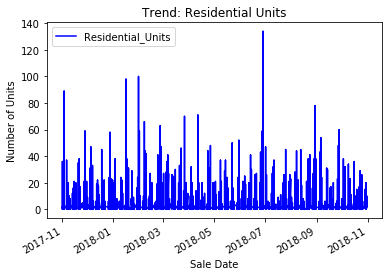

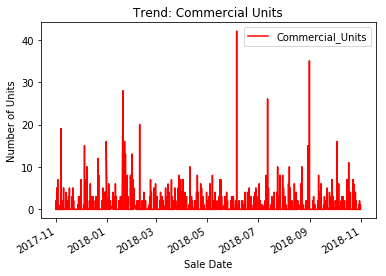

In [5]:
df.plot(y='Residential_Units', use_index=True, color='blue')
plt.title('Trend: Residential Units')
plt.xlabel('Sale Date')
plt.ylabel('Number of Units')

df.plot(y='Commercial_Units', use_index=True, color='red')
plt.title('Trend: Commercial Units')
plt.xlabel('Sale Date')
plt.ylabel('Number of Units')

plt.show()

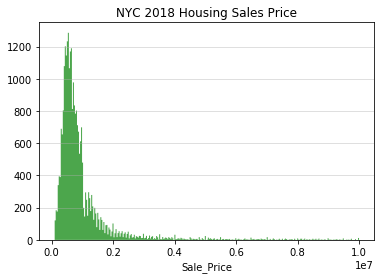

In [6]:
plt.hist(df.Sale_Price, bins=300, histtype='stepfilled', alpha=0.7, color='green', rwidth=1)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Sale_Price')
plt.title('NYC 2018 Housing Sales Price')
plt.show()